In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv")
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,1/1/2013,1,AUTOMOTIVE,0.0,0
1,1,1/1/2013,1,BABY CARE,0.0,0
2,2,1/1/2013,1,BEAUTY,0.0,0
3,3,1/1/2013,1,BEVERAGES,0.0,0
4,4,1/1/2013,1,BOOKS,0.0,0


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   id           1048575 non-null  int64  
 1   date         1048575 non-null  object 
 2   store_nbr    1048575 non-null  int64  
 3   family       1048575 non-null  object 
 4   sales        1048575 non-null  float64
 5   onpromotion  1048575 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB


,id,store_nbr,sales,onpromotion
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2.749256e+01,2.445326e+02,1.147634e-01
std,3.026977e+05,1.558408e+01,8.065892e+02,2.377814e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.621435e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,5.242870e+05,2.700000e+01,1.000000e+00,0.000000e+00
75%,7.864305e+05,4.100000e+01,1.200000e+02,0.000000e+00
max,1.048574e+06,5.400000e+01,4.627100e+04,1.960000e+02


In [6]:
df['date'] = pd.to_datetime(df['date'])
print (df.date)

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
1048570   2014-08-13
1048571   2014-08-13
1048572   2014-08-13
1048573   2014-08-13
1048574   2014-08-13
Name: date, Length: 1048575, dtype: datetime64[ns]


In [7]:
df.isnull().sum()
df = df.dropna()
print(df.dropna)

<bound method DataFrame.dropna of               id       date  store_nbr                      family    sales  \
0              0 2013-01-01          1                  AUTOMOTIVE    0.000   
1              1 2013-01-01          1                   BABY CARE    0.000   
2              2 2013-01-01          1                      BEAUTY    0.000   
3              3 2013-01-01          1                   BEVERAGES    0.000   
4              4 2013-01-01          1                       BOOKS    0.000   
...          ...        ...        ...                         ...      ...   
1048570  1048570 2014-08-13          3                     POULTRY  974.098   
1048571  1048571 2014-08-13          3              PREPARED FOODS  324.293   
1048572  1048572 2014-08-13          3                     PRODUCE   10.000   
1048573  1048573 2014-08-13          3  SCHOOL AND OFFICE SUPPLIES    0.000   
1048574  1048574 2014-08-13          3                     SEAFOOD   69.116   

         onpromot

In [8]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
print(daily_sales)

          date          sales
0   2013-01-01    2511.618999
1   2013-01-02  496092.417944
2   2013-01-03  361461.231124
3   2013-01-04  354459.677093
4   2013-01-05  477350.121229
..         ...            ...
584 2014-08-09  496192.787084
585 2014-08-10  509681.765002
586 2014-08-11  409544.575013
587 2014-08-12  353898.211991
588 2014-08-13  115982.358014

[589 rows x 2 columns]


In [9]:
daily_sales.set_index('date', inplace=True)

In [11]:
daily_sales['7_day_MA'] = daily_sales['sales'].rolling(window=7).mean()
print(daily_sales['7_day_MA'])

date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2014-08-09    452976.802298
2014-08-10    436374.453600
2014-08-11    427570.349455
2014-08-12    418527.597429
2014-08-13    377537.309868
Name: 7_day_MA, Length: 589, dtype: float64


In [12]:
weekly_moving_average = daily_sales['sales'].rolling(window=7).mean()
print(weekly_moving_average)

date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2014-08-09    452976.802298
2014-08-10    436374.453600
2014-08-11    427570.349455
2014-08-12    418527.597429
2014-08-13    377537.309868
Name: sales, Length: 589, dtype: float64


In [14]:
daily_sales['30_day_MA'] = daily_sales['sales'].rolling(window=30).mean()
print(daily_sales['30_day_MA'])

date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2014-08-09    569166.956765
2014-08-10    568301.542839
2014-08-11    556729.736929
2014-08-12    544071.218001
2014-08-13    528441.724896
Name: 30_day_MA, Length: 589, dtype: float64


In [15]:
monthly_moving_average = daily_sales['sales'].rolling(window=7).mean()
print(monthly_moving_average)

date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2014-08-09    452976.802298
2014-08-10    436374.453600
2014-08-11    427570.349455
2014-08-12    418527.597429
2014-08-13    377537.309868
Name: sales, Length: 589, dtype: float64


In [16]:
daily_sales[['sales','7_day_MA','30_day_MA']].tail(20)

,sales,7_day_MA,30_day_MA
date,,,
2014-07-25,579767.285128,610645.936058,598683.620058
2014-07-26,688919.550027,604921.839461,611120.999029
2014-07-27,747307.866620,600755.232114,623671.475468
2014-07-28,583936.685490,598427.840040,626107.004519
2014-07-29,524743.325002,597637.452182,624691.152518
2014-07-30,578056.965281,598192.927794,629648.916188
2014-07-31,532423.558194,605022.176534,623380.347568
2014-08-01,506826.794930,594602.106506,615360.235828
2014-08-02,626533.637869,585689.833341,616783.199730


In [19]:
daily_sales['error'] = daily_sales['sales'] - daily_sales['7_day_MA']
print(daily_sales.error)

date
2013-01-01              NaN
2013-01-02              NaN
2013-01-03              NaN
2013-01-04              NaN
2013-01-05              NaN
                  ...      
2014-08-09     43215.984786
2014-08-10     73307.311403
2014-08-11    -18025.774442
2014-08-12    -64629.385438
2014-08-13   -261554.951854
Name: error, Length: 589, dtype: float64


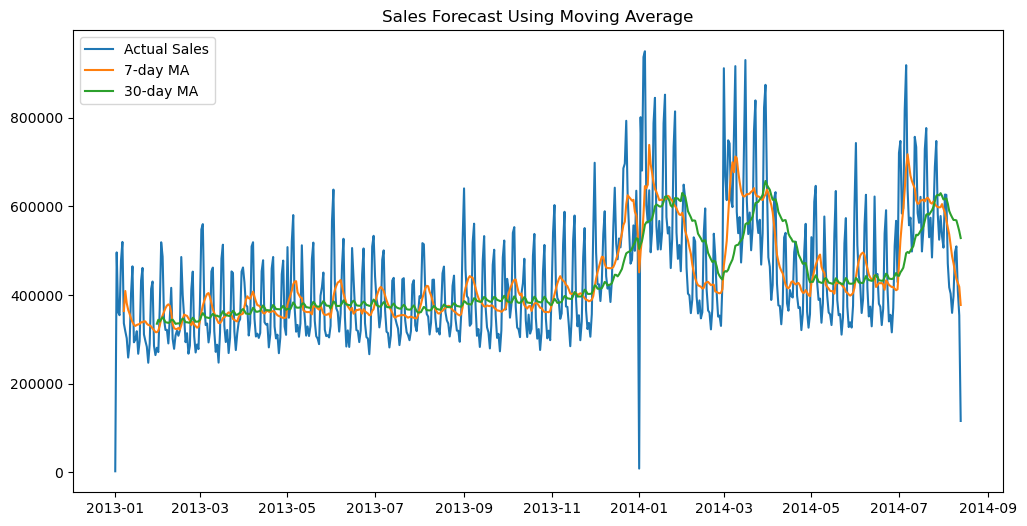

In [20]:
plt.figure(figsize=(12,6))

plt.plot(daily_sales['sales'])
plt.plot(daily_sales['7_day_MA'])
plt.plot(daily_sales['30_day_MA'])

plt.legend(['Actual Sales','7-day MA','30-day MA'])
plt.title("Sales Forecast Using Moving Average")
plt.show()

This visually shows:

Actual sales

Smoothed trends

Forecast behavior

The moving averages helped smooth daily sales fluctuations and made overall trends easier to see. The 7-day moving average responded faster to changes, showing short-term patterns, while the 30-day moving average highlighted longer-term trends. When actual sales were far from the moving average, it showed periods of high volatility. Overall, moving averages made the sales data less noisy and easier to interpret.

Learning Outcomes

Through this project, I learned how moving averages work in time-series forecasting and how different time windows affect results. I practiced preparing time-based data, applying rolling calculations, and visualizing trends. This project also helped me understand the value of simple forecasting methods for identifying business patterns.

In [21]:
forecast = daily_sales['sales'].rolling(7).mean().iloc[-1]
print("Next 7-day forecast:", forecast)

Next 7-day forecast: 377537.30986805714


In [22]:
mae = (daily_sales['sales'] - daily_sales['7_day_MA']).abs().mean()
print("Mean Absolute Error:", mae)

Mean Absolute Error: 80312.92757698275
